# Introduction:
This script is to explore the correlation between embedding similarity and expression similarity
We are working with kinases, one2one orthologs in human and mouse. 

Input is a df with promoter pairs (human to mouse one2one orthologs) with different similarity values:
- Promoter similarity: sequence identity (global alignment)
- Domain identity: same but for kinase domain
- Expression similarity (cosine): calculated based on 5 tissues RNA-seq
- Expression similarity (pearson): calculated based on 5 tissues RNA-seq
- Embedding similarity: extracted from the model
- Label: Positive / Negative / Undefined following different criteria

In [140]:
# Load file
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [259]:
# Define parameters
label_method = "random"
family_id = "kinase"
transform_method = "clr"

folder_id = f"{family_id}_{transform_method}"
# model_results_file = f"../results/model_results/{folder_id}/all_pairs_all_metrics_{label_method}.tsv"
# set_id_pairs_file = f"../results/model_results/{folder_id}/{family_id}_id_pairs_set_{label_method}.tsv"
path = '/Users/crsitina/Documents/phd/promoter_expression/exploratory_analysis'
print(path)
os.chdir(path)


model_results_file = f"../results/model_results/{folder_id}/dna_pairs_with_embeddings.tsv"
set_id_pairs_file = f"../results/model_results/{folder_id}/validation_pairs_df.tsv"


/Users/crsitina/Documents/phd/promoter_expression/exploratory_analysis


(1000, 16) (65076, 16)


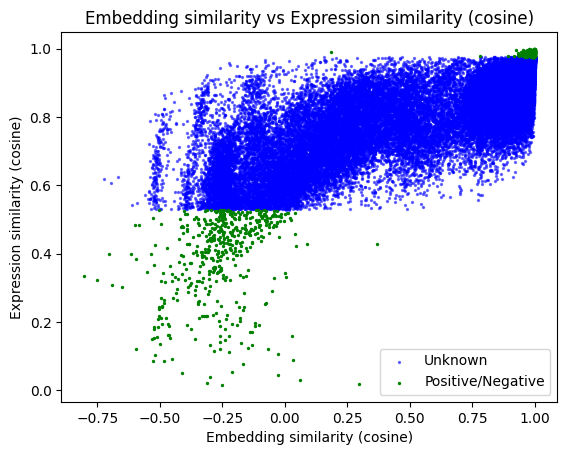

In [267]:
df = pd.read_csv(model_results_file, sep = "\t", index_col = 0)
validation = pd.read_csv(set_id_pairs_file, sep = "\t", index_col = 0)

pos_neg = pd.merge(validation, df, left_on = ["human_id", "mouse_id"], right_on = ["human_id", "mouse_id"], how = 'inner')

unknown = df[df['label'] == "U"]


print(pos_neg.shape, unknown.shape)

# Plot a scatter plot of emb_sim_cosine against exp_sim_cosing for the train and test sets
plt.figure()
plt.scatter(unknown['Cosine Similarity'], unknown['cos_sim'], s=2, alpha=0.5, c = 'blue')
plt.scatter(pos_neg['Cosine Similarity'], pos_neg['cos_sim'], s=2, alpha=1, c = 'green')
plt.legend(['Unknown', 'Positive/Negative'])
plt.xlabel('Embedding similarity (cosine)')
plt.ylabel('Expression similarity (cosine)')
plt.title('Embedding similarity vs Expression similarity (cosine)')
plt.show()

In [250]:
# Load data
df = pd.read_csv(model_results_file, sep="\t")
set_id_pairs = pd.read_csv(set_id_pairs_file, sep="\t")

# Subset the set_id_pairs into training, validation and test sets
train_pairs = set_id_pairs[set_id_pairs['model'] == 'training']
validation_pairs = set_id_pairs[set_id_pairs['model'] == 'validation']
test_pairs = set_id_pairs[set_id_pairs['model'] == 'test']

print(f"Number of training pairs {train_pairs.shape}")
print(f"Number of validation pairs {validation_pairs.shape}")
print(f"Number of test pairs {test_pairs.shape}")

# Extract a list of the pairs that are in the train set (gene_id_human, gene_id_mouse)
train_pairs_list = list(zip(train_pairs['gene_id_human'], train_pairs['gene_id_mouse']))

# Add a column to df that is True if the pair is in the train set and False otherwise
df['train'] = df.apply(lambda x: (x['gene_id_human'], x['gene_id_mouse']) in train_pairs_list, axis = 1)

# Divide the data frame into train and the rest
train_results = df[df['train']]
notrain_results = df[~df['train']]
print(train_results.shape, notrain_results.shape)

# The test results, divide them into positive/negative and unknown (label column)
pos_neg = notrain_results[notrain_results['label'] != 'U'] # validation and test set
unknown = notrain_results[notrain_results['label'] == 'U']
print(pos_neg.shape, unknown.shape)

Number of training pairs (7000, 5)
Number of validation pairs (2100, 5)
Number of test pairs (900, 5)
(7000, 15) (60600, 15)
(3000, 15) (57600, 15)


In [265]:
# Plot a scatter plot of emb_sim_cosine against exp_sim_cosing for the train and test sets
plt.figure()
plt.scatter(unknown['emb_sim_cos'], unknown['exp_sim_cosine'], s=2, alpha=0.5, c = 'blue')
plt.scatter(pos_neg['emb_sim_cos'], pos_neg['exp_sim_cosine'], s=2, alpha=1, c = 'green')
plt.legend(['Unknown', 'Positive/Negative'])
plt.xlabel('Embedding similarity (cosine)')
plt.ylabel('Expression similarity (cosine)')
plt.title('Embedding similarity vs Expression similarity (cosine)')
plt.savefig(f"./plots/{folder_id}/{label_method}/emb_sim_vs_exp_sim_{label_method}.png")

KeyError: 'emb_sim_cos'

<Figure size 640x480 with 0 Axes>

In [254]:
# Compute correlation of emb_sim_cos and exp_sim_cosine for the non-train set
corr = np.corrcoef(pos_neg['emb_sim_cos'], pos_neg['exp_sim_cosine'])
print(f"Correlation of eembedding similarity and expression similarity (Cosine) for the non-train set: {corr[0][1]}")
# Compute correlation of emb_sim_cos and exp_sim_cosine for the train set
corr_train = np.corrcoef(train_results['emb_sim_cos'], train_results['exp_sim_cosine'])
print(f"Correlation of eembedding similarity and expression similarity (Cosine) for the train set: {corr_train[0][1]}")

# Write correlation values to a text file
with open(f"./results/{folder_id}_{label_method}_report.txt", "w") as f:
    f.write(f"Correlation of embedding similarity and expression similarity (Cosine) for the non-train set: {corr[0][1]}\n")
    f.write(f"Correlation of embedding similarity and expression similarity (Cosine) for the train set: {corr_train[0][1]}\n")

Correlation of eembedding similarity and expression similarity (Cosine) for the non-train set: 0.04211345478906354
Correlation of eembedding similarity and expression similarity (Cosine) for the train set: 0.017201974973438092


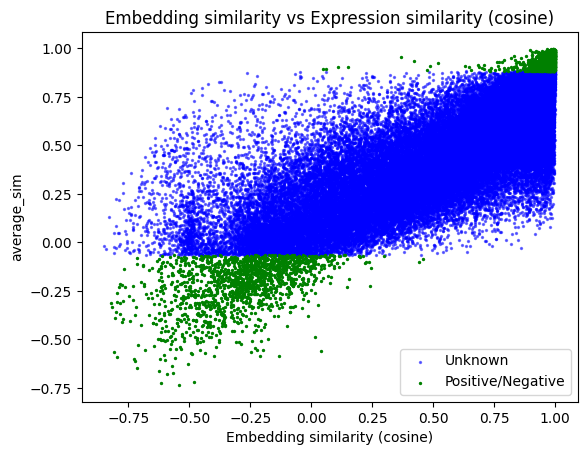

In [225]:
# Plot a scatter plot of emb_sim_cosine against {reference_column} for the train and test sets
# reference_column = 'exp_sim_cosine'
reference_column = 'average_sim'
plt.figure()
plt.scatter(unknown['emb_sim_cos'], unknown[f'{reference_column}'], s=2, alpha=0.5, c = 'blue')
plt.scatter(pos_neg['emb_sim_cos'], pos_neg[f'{reference_column}'], s=2, alpha=1, c = 'green')
plt.legend(['Unknown', 'Positive/Negative'])
plt.xlabel('Embedding similarity (cosine)')
plt.ylabel(f'{reference_column}')
plt.title('Embedding similarity vs Expression similarity (cosine)')
plt.savefig(f"./plots/{folder_id}/{label_method}/emb_sim_vs_{reference_column}_{label_method}.png")


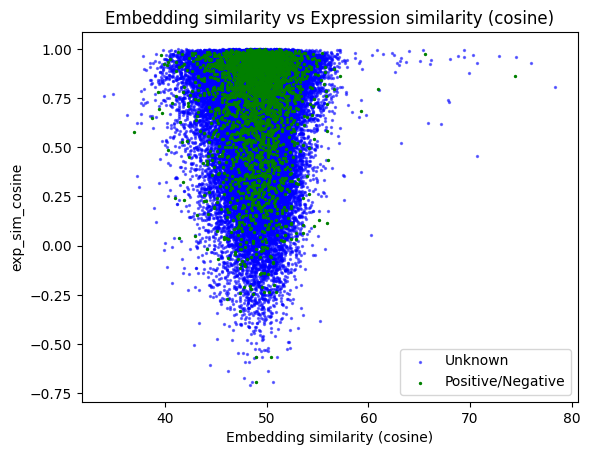

In [253]:
# Plot a scatter plot of emb_sim_cosine against {reference_column} for the train and test sets
reference_column = 'exp_sim_cosine'
plt.figure()
plt.scatter(unknown['promoter_identity'], unknown[f'{reference_column}'], s=2, alpha=0.5, c = 'blue')
plt.scatter(pos_neg['promoter_identity'], pos_neg[f'{reference_column}'], s=2, alpha=1, c = 'green')
plt.legend(['Unknown', 'Positive/Negative'])
plt.xlabel('Embedding similarity (cosine)')
plt.ylabel(f'{reference_column}')
plt.title('Embedding similarity vs Expression similarity (cosine)')
plt.savefig(f"./plots/{folder_id}/{label_method}/promoter_identity_vs_{reference_column}_{label_method}.png")

In [151]:
# Compute some statistics and write them to a file
# compute pearsin correlation between emb_sim_cos and exp_sim_cos for the train and test sets
pearson_train = train_results['emb_sim_cos'].corr(train_results['exp_sim_cosine'])
pearson_notrain = notrain_results['emb_sim_cos'].corr(notrain_results['exp_sim_cosine'])

# cor_average_train = train_results['emb_sim_cos'].corr(train_results['average_sim'])
# cor_average_notrain = notrain_results['emb_sim_cos'].corr(notrain_results['average_sim'])

text = f""" 
Correlation between embedding similarity and expression similarity (cosine) for the train set: {pearson_train}
Correlation between embedding similarity and expression similarity (cosine) for the non train (val/test + unkown) set: {pearson_notrain}

"""
# text = f""" 
# Correlation between embedding similarity and expression similarity (cosine) for the train set: {pearson_train}
# Correlation between embedding similarity and expression similarity (cosine) for the non train (val/test + unkown) set: {pearson_notrain}

# Correlation between embedding similarity and average similarity (cos/pearson) for the train set: {cor_average_train}
# Correlation between embedding similarity and average similarity (cos/pearson) for the non train (val/test + unkown) set: {cor_average_notrain}

# """

with open(f"./results/{folder_id}_{label_method}_report.txt", "w") as text_file:
    text_file.write(text)

# Interpretation:
Just by looking at the final correlation, it appears to be worse than other pos/neg definitions, but the plot shows that there are more points being shifted to the right into a more informative area. 
We need another metric that allows us to evaluate it. 

In [210]:
def analyze_intervals(dataframe, reference_column_exp, reference_column_sequence):
    # interval_df = dataframe.copy()
    interval_df = dataframe.sort_values(by=reference_column_sequence, ascending=False)
    # Ensure the reference column exists in the dataframe
    if reference_column_exp not in interval_df.columns or reference_column_sequence not in interval_df.columns:
        raise ValueError("The specified reference columns do not exist in the dataframe.")
    else:
        print(f"Reference columns {reference_column_exp} and {reference_column_sequence} exist in the dataframe.")
    # Initialize a list to store the results
    results = []
    
    # Calculate the range of the reference_column_sequence
    min_value = interval_df[reference_column_sequence].min().round(2)
    max_value = interval_df[reference_column_sequence].max().round(2)

    steps = max_value / 40

    print(f"Min value: {min_value}, Max value: {max_value}, Steps: {steps}")

    # Iterate over the intervals
    for i in np.arange(max_value, min_value, -steps):
        print(f"Interval: {i:.2f}-{i-steps:.2f}")
        # Define the interval
        df = interval_df[(interval_df[reference_column_sequence] <= i) & (interval_df[reference_column_sequence] > i - steps)]
        print(df.shape)
        # Calculate the number of pairs (rows) in the interval
        num_pairs = df.shape[0]
        print(num_pairs)

        # Extract maximum and minimum values of the reference column
        max_value = df[reference_column_exp].max()
        min_value = df[reference_column_exp].min()

        # Difference between maximum and minimum
        diff_value = max_value - min_value

        # Extract 1st and 3rd quartile of the reference column
        q1_value = df[reference_column_exp].quantile(0.05)
        q3_value = df[reference_column_exp].quantile(0.95)

        # Compute difference of q3 and q1
        iqr_value = q3_value - q1_value

        # Append the results to the list
        results.append({
            f"Interval of {reference_column_sequence}": f"{i:.2f}-{i-steps:.2f}",
            "num_pairs": num_pairs,
            f"max_{reference_column_exp}": max_value,
            f"min_{reference_column_exp}": min_value,
            f"diff_{reference_column_exp}": diff_value,
            f"q1_{reference_column_exp}": q1_value,
            f"q3_{reference_column_exp}": q3_value,
            f"iqr_{reference_column_exp}": iqr_value
        })

        # Convert the results to a dataframe
        results_df = pd.DataFrame(results)

        # Round the values to 2 decimal places
        results_df[f"max_{reference_column_exp}"] = results_df[f"max_{reference_column_exp}"].round(2)
        results_df[f"min_{reference_column_exp}"] = results_df[f"min_{reference_column_exp}"].round(2)
        results_df[f"q1_{reference_column_exp}"] = results_df[f"q1_{reference_column_exp}"].round(2)
        results_df[f"q3_{reference_column_exp}"] = results_df[f"q3_{reference_column_exp}"].round(2)
        results_df[f"iqr_{reference_column_exp}"] = results_df[f"iqr_{reference_column_exp}"].round(2)
        results_df["num_pairs"] = results_df["num_pairs"].astype(int)
    
    print(f"Number of intervals: {len(results)}")
    return results_df

In [255]:
identity_stats = calculate_statistics(analyze_intervals(notrain_results, 'exp_sim_cosine', 'promoter_identity'), 'exp_sim_cosine', 'promoter_identity')
with open(f"./results/{folder_id}_{label_method}_report.txt", "a") as text_file:
    text_file.write(identity_stats)

promoter_stats = calculate_statistics(analyze_intervals(notrain_results, 'exp_sim_cosine', 'emb_sim_cos'), 'exp_sim_cosine', 'emb_sim_cos')
with open(f"./results/{folder_id}_{label_method}_report.txt", "a") as text_file:
    text_file.write(promoter_stats)

Reference columns exp_sim_cosine and promoter_identity exist in the dataframe.
Min value: 34.01, Max value: 78.37, Steps: 1.9592500000000002
Interval: 78.37-76.41
(1, 15)
1
Interval: 76.41-74.45
(2, 15)
2
Interval: 74.45-72.49
(2, 15)
2
Interval: 72.49-70.53
(2, 15)
2
Interval: 70.53-68.57
(5, 15)
5
Interval: 68.57-66.61
(4, 15)
4
Interval: 66.61-64.66
(6, 15)
6
Interval: 64.66-62.70
(7, 15)
7
Interval: 62.70-60.74
(7, 15)
7
Interval: 60.74-58.78
(10, 15)
10
Interval: 58.78-56.82
(38, 15)
38
Interval: 56.82-54.86
(358, 15)
358
Interval: 54.86-52.90
(1985, 15)
1985
Interval: 52.90-50.94
(9532, 15)
9532
Interval: 50.94-48.98
(20876, 15)
20876
Interval: 48.98-47.02
(17037, 15)
17037
Interval: 47.02-45.06
(7393, 15)
7393
Interval: 45.06-43.10
(2395, 15)
2395
Interval: 43.10-41.14
(707, 15)
707
Interval: 41.14-39.19
(193, 15)
193
Interval: 39.19-37.23
(35, 15)
35
Interval: 37.23-35.27
(3, 15)
3
Interval: 35.27-33.31
(2, 15)
2
Number of intervals: 23


    MINIMUM AND MAXIMUM promoter_identi

In [218]:
def calculate_statistics(results_df, reference_column, reference_column_sequence):
    # Average of the "diff_{reference_column}"
    average_diff = results_df[f"diff_{reference_column}"].mean()
    above_average_intervals = results_df[results_df[f"diff_{reference_column}"] > average_diff].shape[0]
    below_average_intervals = results_df[results_df[f"diff_{reference_column}"] < average_diff].shape[0]
    above_average_intervals_df = results_df[results_df[f"diff_{reference_column}"] > average_diff]
    below_average_intervals_df = results_df[results_df[f"diff_{reference_column}"] < average_diff]
    total_pairs_informative = below_average_intervals_df["num_pairs"].sum()
    total_pairs = results_df["num_pairs"].sum()
    percentage = round((total_pairs_informative / total_pairs) * 100, 2)

    # Average of the "iqr_{reference_column}"
    average_iqr = results_df[f"iqr_{reference_column}"].mean()
    above_average_intervals_iqr = results_df[results_df[f"iqr_{reference_column}"] > average_iqr].shape[0]
    below_average_intervals_iqr = results_df[results_df[f"iqr_{reference_column}"] < average_iqr].shape[0]
    above_average_intervals_iqr_df = results_df[results_df[f"iqr_{reference_column}"] > average_iqr]
    below_average_intervals_iqr_df = results_df[results_df[f"iqr_{reference_column}"] < average_iqr]
    total_pairs_informative_iqr = below_average_intervals_iqr_df["num_pairs"].sum()
    percentage_iqr = round((total_pairs_informative_iqr / total_pairs) * 100, 2)

    # Keep only first and last rows of the dataframe
    above_average_intervals_df = above_average_intervals_df.iloc[[0, -1]]
    below_average_intervals_df = below_average_intervals_df.iloc[[0, -1]]
    above_average_intervals_iqr_df = above_average_intervals_iqr_df.iloc[[0, -1]]
    below_average_intervals_iqr_df = below_average_intervals_iqr_df.iloc[[0, -1]]

    # Format the text
    text = f"""

    MINIMUM AND MAXIMUM {reference_column_sequence}:

    - Average difference of {reference_column}: {average_diff:.2f}
    - Number of intervals above the average difference (non-informative): {above_average_intervals} out of {results_df.shape[0]} intervals
    - Number of intervals below the average difference (informative): {below_average_intervals} out of {results_df.shape[0]} intervals
    => Total number of pairs in the informative intervals: {total_pairs_informative} out of {total_pairs} ({percentage}%)

    Non-informative intervals:
    {above_average_intervals_df.iloc[:, 0:2]}

    Informative intervals:
    {below_average_intervals_df.iloc[:, 0:2]}

    INTERQUARTILE RANGE (0.05 and 0.95):
    - Average interquartile range of {reference_column}: {average_iqr:.2f}
    - Number of intervals above the average interquartile range (non-informative): {above_average_intervals_iqr} out of {results_df.shape[0]} intervals
    - Number of intervals below the average interquartile range (informative): {below_average_intervals_iqr} out of {results_df.shape[0]} intervals
    => Total number of pairs in the informative intervals (interquartile range): {total_pairs_informative_iqr} out of {total_pairs} ({percentage_iqr}%)

    Non-informative intervals:
    {above_average_intervals_iqr_df.iloc[:, 0:3]}

    Informative intervals:
    {below_average_intervals_iqr_df.iloc[:, 0:3]}
    """
    print(text)
    return text


Reference columns exp_sim_cosine and promoter_identity exist in the dataframe.
Min value: 34.01, Max value: 78.37, Steps: 1.9592500000000002
Interval: 78.37-76.41
(1, 14)
1
Interval: 76.41-74.45
(3, 14)
3
Interval: 74.45-72.49
(2, 14)
2
Interval: 72.49-70.53
(2, 14)
2
Interval: 70.53-68.57
(4, 14)
4
Interval: 68.57-66.61
(4, 14)
4
Interval: 66.61-64.66
(6, 14)
6
Interval: 64.66-62.70
(6, 14)
6
Interval: 62.70-60.74
(5, 14)
5
Interval: 60.74-58.78
(10, 14)
10
Interval: 58.78-56.82
(35, 14)
35
Interval: 56.82-54.86
(367, 14)
367
Interval: 54.86-52.90
(1979, 14)
1979
Interval: 52.90-50.94
(9562, 14)
9562
Interval: 50.94-48.98
(20890, 14)
20890
Interval: 48.98-47.02
(16985, 14)
16985
Interval: 47.02-45.06
(7393, 14)
7393
Interval: 45.06-43.10
(2387, 14)
2387
Interval: 43.10-41.14
(717, 14)
717
Interval: 41.14-39.19
(198, 14)
198
Interval: 39.19-37.23
(37, 14)
37
Interval: 37.23-35.27
(5, 14)
5
Interval: 35.27-33.31
(2, 14)
2
Number of intervals: 23


    MINIMUM AND MAXIMUM:

    - Average

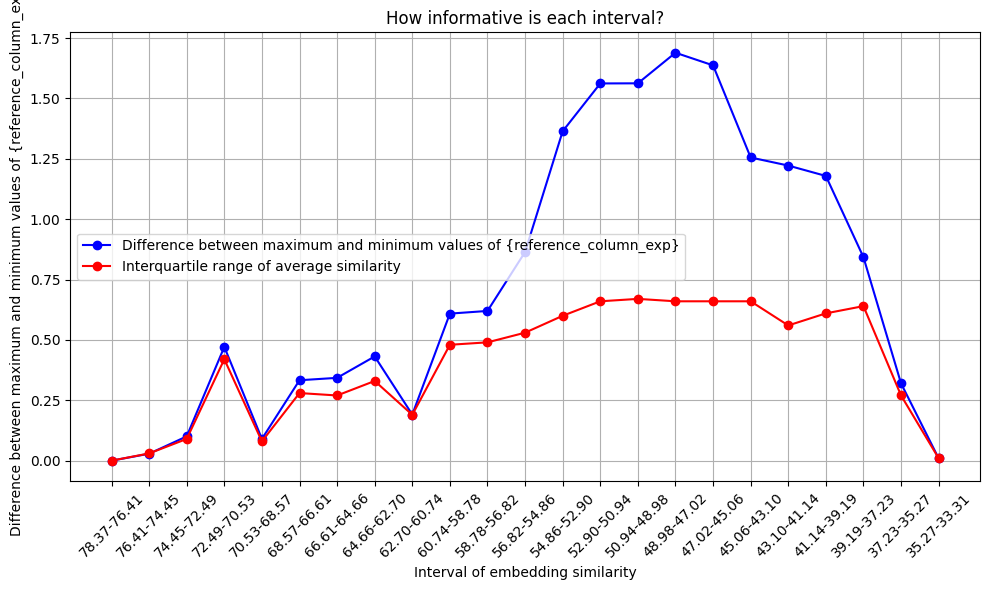

In [213]:
reference_column_exp = "exp_sim_cosine"
reference_column_sequence = "promoter_identity"
results_df = analyze_intervals(notrain_results, reference_column_exp, reference_column_sequence)
results_df.to_csv(f"./results/{folder_id}_{label_method}_{reference_column_sequence}_intervals.tsv", index=False, sep ="\t")

text = calculate_statistics(results_df, reference_column_exp)

with open(f"./results/{folder_id}_{label_method}_report.txt", "a") as text_file:
    text_file.write(text)


# Plot the difference between maximum and minimum values of the average similarity (a line, not a barplot)
plt.figure(figsize=(10, 6))
plt.plot(results_df[f"Interval of {reference_column_sequence}"], results_df[f"diff_{reference_column}"], marker='o', color='blue')
plt.plot(results_df[f"Interval of {reference_column_sequence}"], results_df[f"iqr_{reference_column}"], marker='o', color='red')
plt.xlabel('Interval of embedding similarity')
# Red and blue lines legend
plt.legend(['Difference between maximum and minimum values of {reference_column_exp}', 'Interquartile range of average similarity'])
plt.ylabel('Difference between maximum and minimum values of {reference_column_exp}')
plt.title('How informative is each interval?')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig(f"./plots/{folder_id}/{label_method}/eval_interval_information.png")

In [159]:
# Plot the difference between maximum and minimum values of the average similarity (a line, not a barplot)
plt.figure(figsize=(10, 6))
plt.plot(results_df["Interval of embedding similarity"], results_df["diff_average_sim"], marker='o', color='blue')
plt.plot(results_df["Interval of embedding similarity"], results_df["iqr_average_sim"], marker='o', color='red')
plt.xlabel('Interval of embedding similarity')
# Red and blue lines legend
plt.legend(['Difference between maximum and minimum values of average similarity', 'Interquartile range of average similarity'])
plt.ylabel('Difference between maximum and minimum values of average similarity')
plt.title('How informative is each interval?')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig(f"./plots/{folder_id}/{label_method}/eval_interval_information.png")


KeyError: 'diff_average_sim'

<Figure size 1000x600 with 0 Axes>